<a href="https://colab.research.google.com/github/chonorat/Data-Mining-Projects/blob/master/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm
from pandas import Series
from numpy.random import randn
import warnings
import io
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
# Data Importation
from google.colab import files
uploaded = files.upload()
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


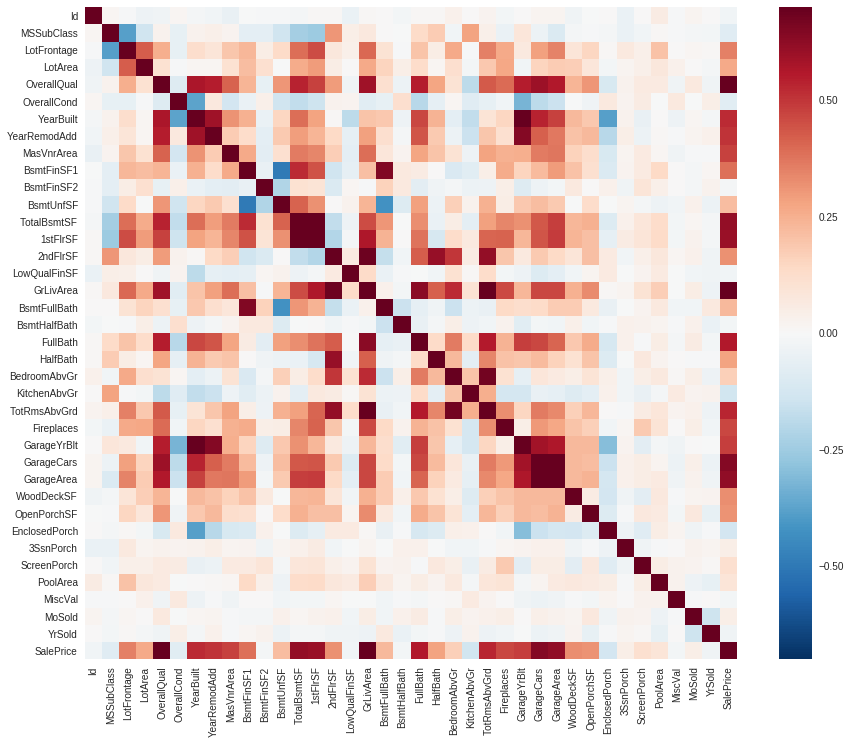

In [4]:
corr = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmax=0.7, square=True);
#Saleprice is correlated with 'OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFloor', 'FullBath', 'YearBuilt'
#'GarageCars' and 'GarageArea' are interchangable. 
#'TotalBcmtSF' and '1stFloor' are interchangable.
#'TotRmsAbvGrd' and 'GrLivArea' are interchangable.

Total
GarageCars       0
GrLivArea        0
OverallQual      0
YearBuilt        0
FullBath         0
TotalBsmtSF      0
SalePrice        0

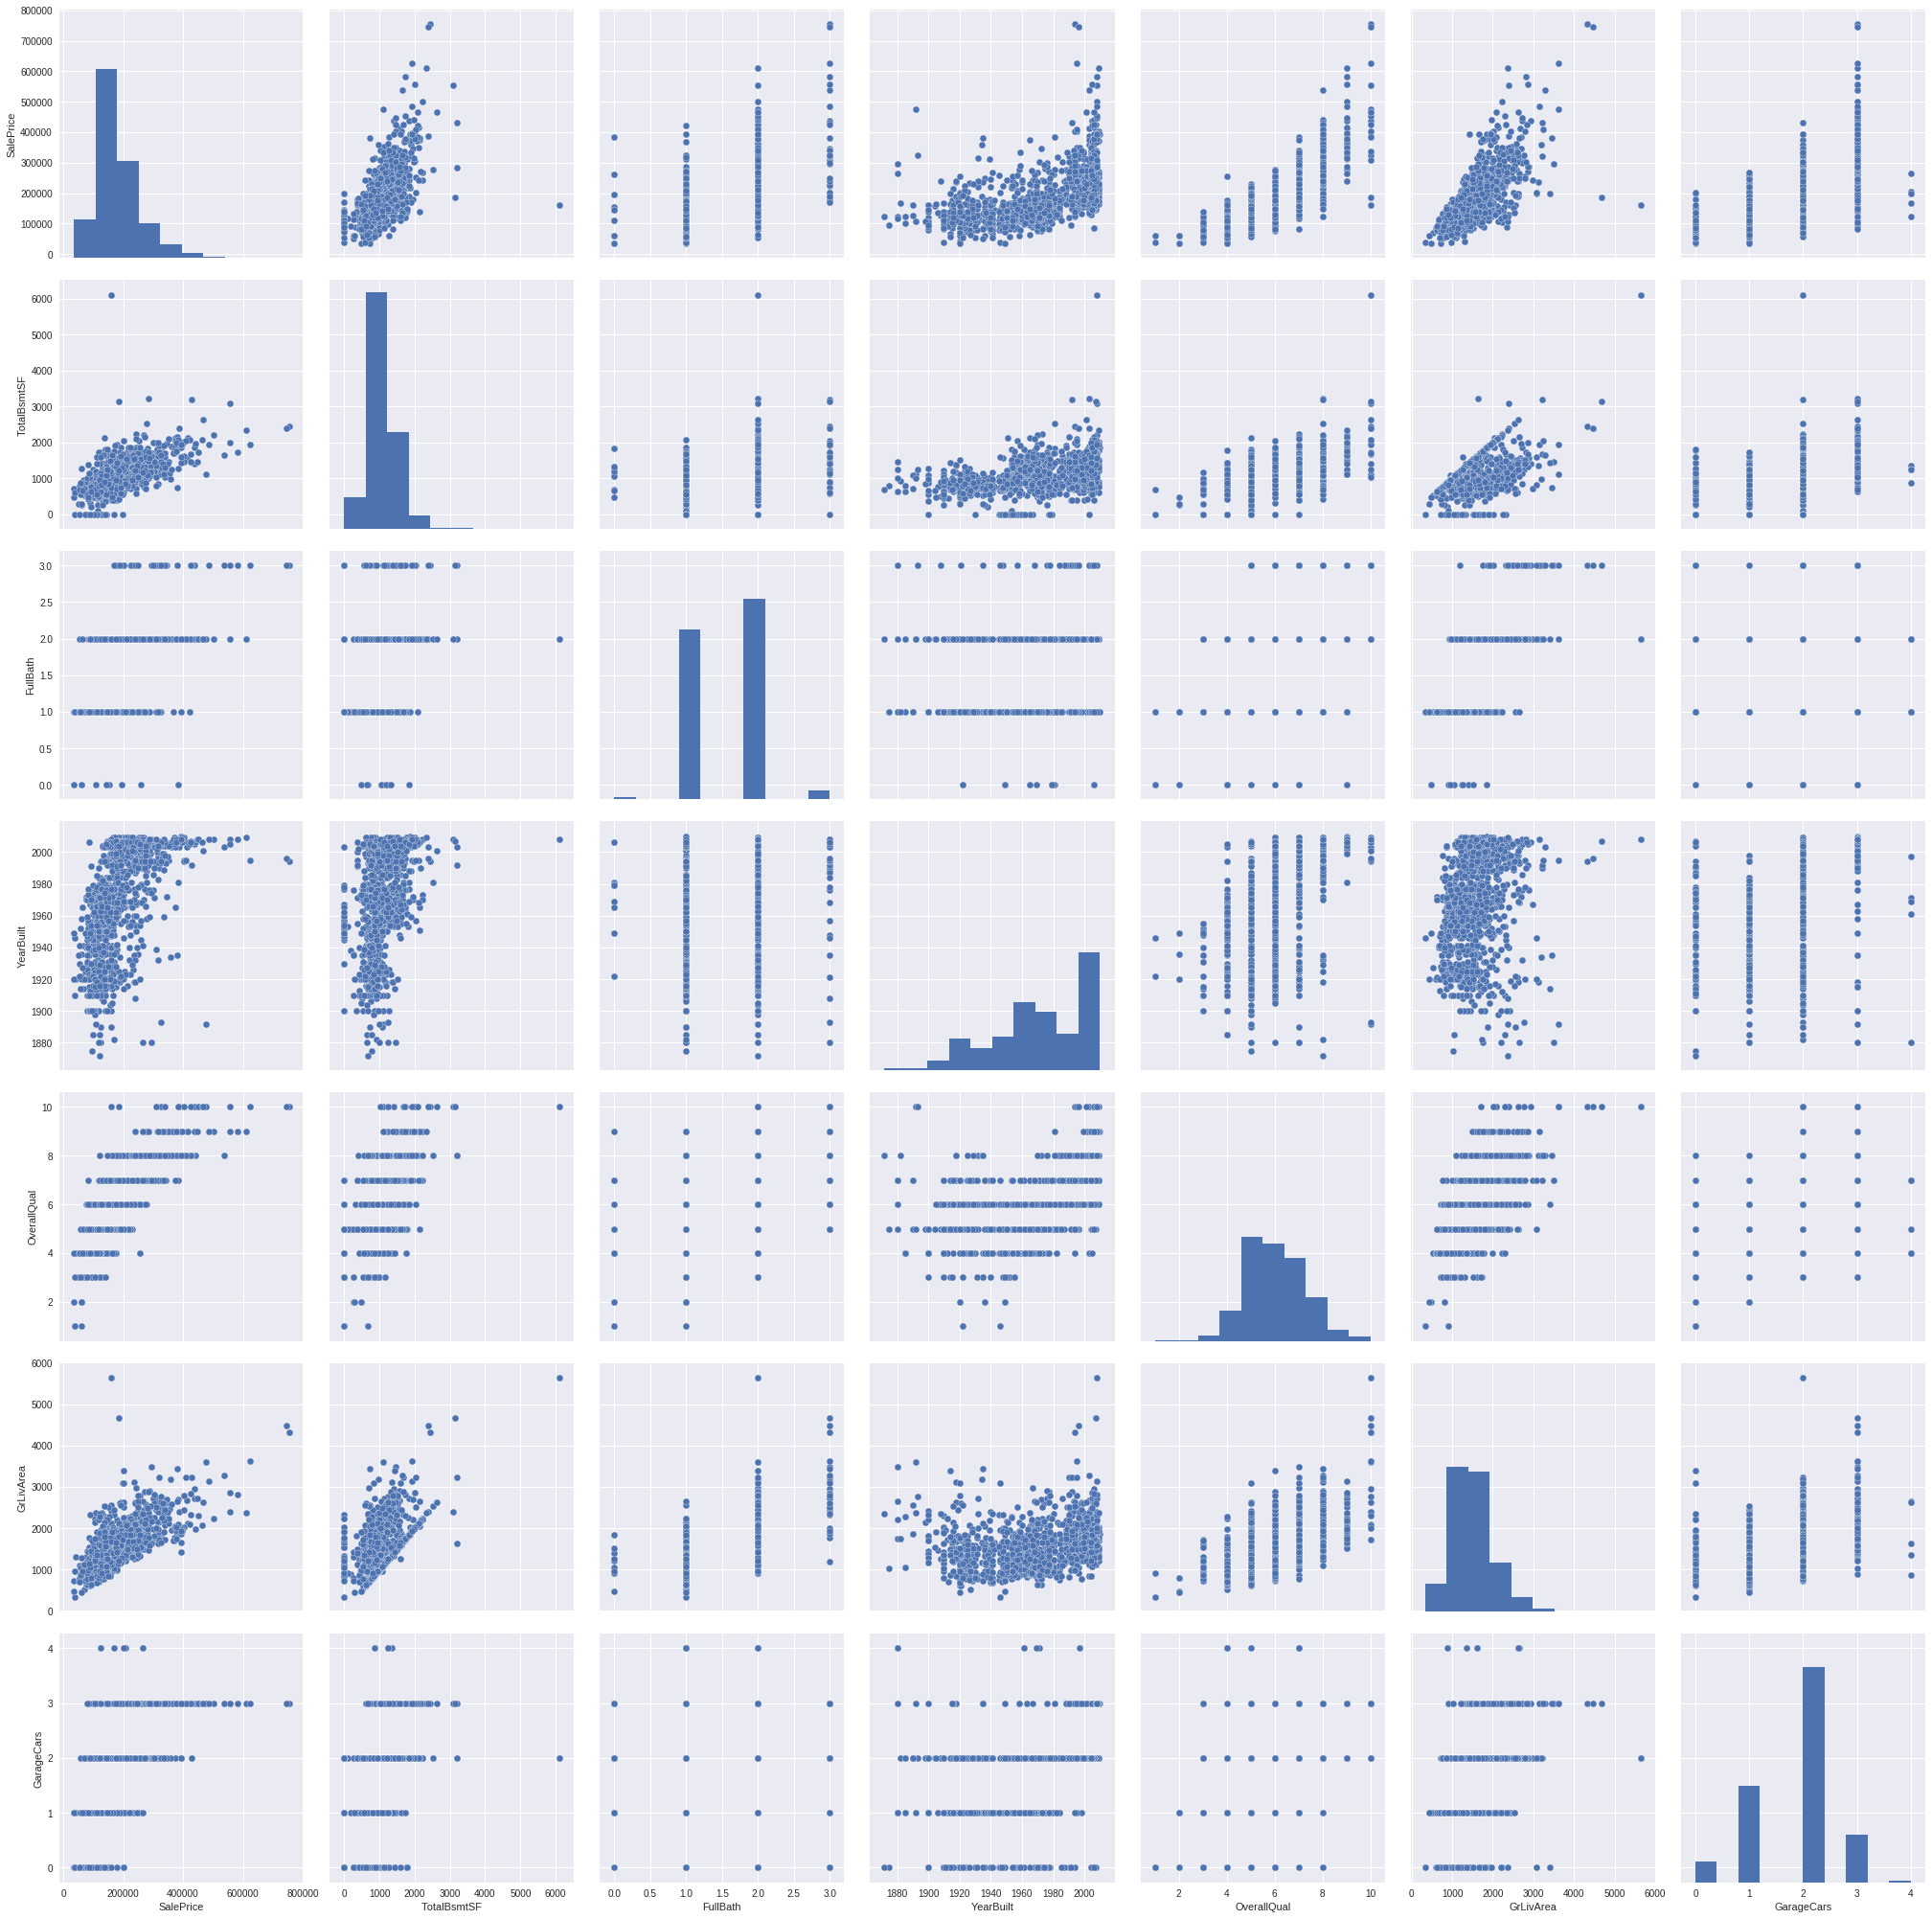

In [49]:
sns.set()
cols = ['SalePrice', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'OverallQual', 'GrLivArea', 'GarageCars']
smallcols = ['TotalBsmtSF', 'FullBath', 'YearBuilt', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df_train[cols], size = 4)
missing = df_train[cols].isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([missing], axis=1, keys=['Total'])
missing_data.head(20)
#No missing data in these variables

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


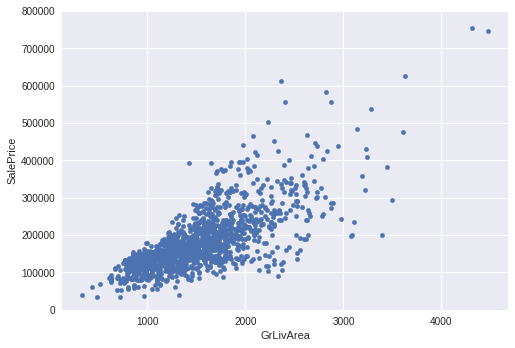

In [0]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


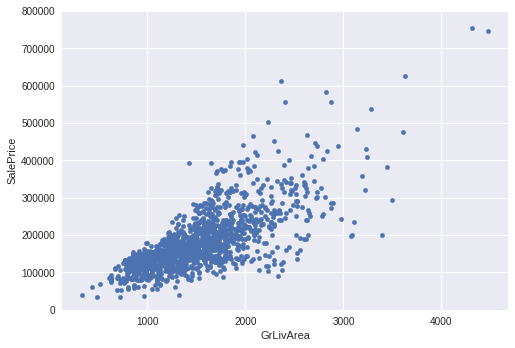

In [0]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [0]:
X_train=df_train[['TotalBsmtSF', 'FullBath', 'YearBuilt', 'OverallQual', 'GrLivArea', 'GarageCars']]
y_train=df_train[['SalePrice']]
X_test=df_test[['TotalBsmtSF', 'FullBath', 'YearBuilt', 'OverallQual', 'GrLivArea', 'GarageCars']]
X_test = X_test.fillna(X_test.mean())
params = {'alpha': 10.0, 'max_iter': 50000}
ridge = Ridge(**params)
ridge.fit(X_train,y_train)
yhat = ridge.predict(X_test)
submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': yhat[:,0]})
submission.to_csv("submission_ridge.csv", index=None)